## Customer Clustering System based on RMA

In [179]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import sklearn
%matplotlib inline

### Get Data

#### <font color=darkblue>We get our data from UCI archive set</font>

In [10]:
df=pd.read_excel('C:/Users/manda/Downloads/OnlineRetail.xlsx')

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df.shape

(541909, 8)

### EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [25]:
df.CustomerID.isna().value_counts()

False    397924
True     133361
Name: CustomerID, dtype: int64

In [26]:
df.Description.isna().value_counts()

False    530693
True        592
Name: Description, dtype: int64

In [28]:
df.dropna(inplace=True)

#### We drop null values as Customer id's are null and we want to  segregate customers only so,also we have small number of null values for Description as well. Drop them as well.
#### We also have negative value in quantity and unit price.

In [22]:
df.drop(df[df.Quantity<0].index,inplace=True)

In [30]:
df[df.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [32]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### Data is clean now. Make RFM data out of it.

In [35]:
df['InvoiceDate']=df.InvoiceDate.dt.date#parsing date

In [36]:
df['TotalSum']=df.Quantity*df.UnitPrice#Total price =quantity*unitprice

In [43]:
compare_date=max(df.InvoiceDate)+datetime.timedelta(days=1)#compare date to compare all the other dates with this

In [46]:
customerdf=df.groupby(['CustomerID']).agg({'InvoiceDate':lambda x: (compare_date-x.max()).days,
'InvoiceNo':'count','TotalSum':'sum'})#group by customers

In [48]:
customerdf.rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)#rename the columns to Recency,Frequency,MonetaryValue

In [198]:
compare_date

datetime.date(2011, 12, 10)

In [55]:
customerdf.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [50]:
customerdf.shape

(4339, 3)

In [52]:
customerdf.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4339 non-null   int64  
 1   Frequency      4339 non-null   int64  
 2   MonetaryValue  4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [54]:
customerdf.describe()

,Recency,Frequency,MonetaryValue
count,4339.000000,4339.000000,4339.000000
mean,93.041484,91.708689,2053.793018
std,100.007757,228.792852,8988.248381
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,307.245000
50%,51.000000,41.000000,674.450000
75%,142.500000,100.000000,1661.640000
max,374.000000,7847.000000,280206.020000


## Data Visualization
>- Let's look at the distribution of each column.

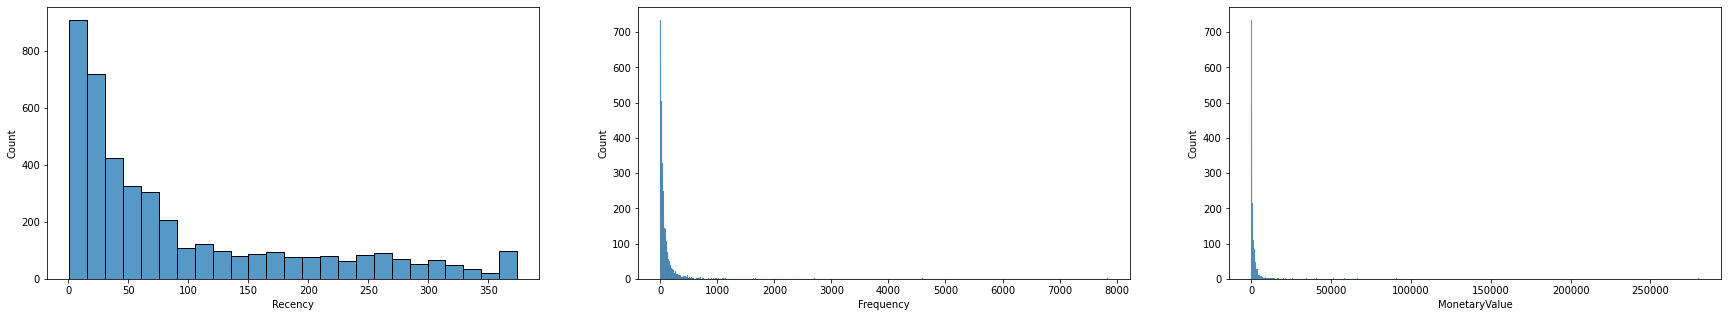

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(30, 5))
sns.histplot(x=customerdf.Recency,ax=axes[0]);
sns.histplot(x=customerdf.Frequency,ax=axes[1]);
sns.histplot(x=customerdf.MonetaryValue,ax=axes[2]);

### We have to apply some transformation as data is highly skewed. Let's start with Log transformation.

In [126]:
customers_logT=customerdf.copy()

In [127]:
customers_logT.Recency=np.log(customerdf.Recency)

In [128]:
customers_logT.Frequency=np.log(customerdf.Frequency)

In [129]:
customers_logT.MonetaryValue=np.log(customerdf.MonetaryValue)

C:\Users\manda\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


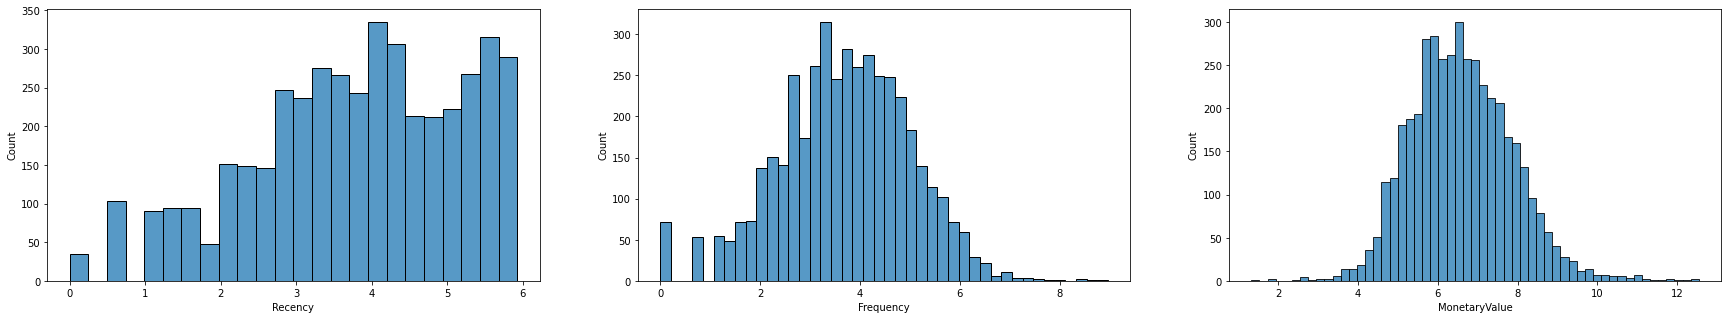

In [130]:
fig, axes = plt.subplots(1, 3, figsize=(30, 5))
sns.histplot(x=customers_logT.Recency,ax=axes[0]);
sns.histplot(x=customers_logT.Frequency,ax=axes[1]);
sns.histplot(x=customers_logT.MonetaryValue,ax=axes[2]);


In [131]:
customers_logT.describe()

,Recency,Frequency,MonetaryValue
count,4339.000000,4339.000000,4339.000000
mean,3.800803,3.679094,-inf
std,1.383560,1.326943,NaN
min,0.000000,0.000000,-inf
25%,2.890372,2.833213,5.727645
50%,3.931826,3.713572,6.513898
75%,4.959336,4.605170,7.415560
max,5.924256,8.967887,12.543280


In [132]:
customers_logT[customers_logT.MonetaryValue<0].index

Float64Index([13256.0], dtype='float64', name='CustomerID')

In [134]:
customers_logT.drop(customers_logT[customers_logT.MonetaryValue<0].index,inplace=True)#I am dropping this bcz of -infinity
#will drop from the customersdf as well

In [135]:
customers_logT.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,3.801055,3.679942,6.590782
std,1.383620,1.325919,1.260895
min,0.000000,0.000000,1.321756
25%,2.890372,2.833213,5.728199
50%,3.931826,3.713572,6.513949
75%,4.961090,4.605170,7.415621
max,5.924256,8.967887,12.543280


### After log transformation our data is somewhat normally distributed, also no feature scaling is required now.

## Model Deployment

In [157]:
from sklearn.cluster import KMeans


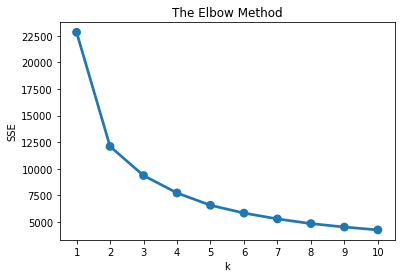

In [159]:
# Building KMeans Algorithm on the dataset

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_logT)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

#Elbow Plot    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


#### This predictive modelling tells us that 3 number of clusters will be good to have.

In [117]:
#Final Model
kmeans_model=KMeans(n_clusters=3)
kmeans_model.fit(customers_logT)

KMeans(n_clusters=3)

In [137]:
customerdf.drop(13256,inplace=True)#same thing I removed from customer log transformation bcz of -infinity

In [138]:
customerdf["Cluster"] = kmeans_model.labels_
customerdf.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         13.10    250.34       6194.19  1022
1        177.57     14.83        298.51  1478
2         69.56     65.37       1164.17  1838

<AxesSubplot:xlabel='Recency', ylabel='MonetaryValue'>

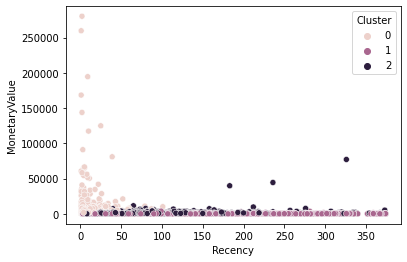

In [141]:
sns.scatterplot(x='Recency',y='MonetaryValue',data=customerdf,hue='Cluster')

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

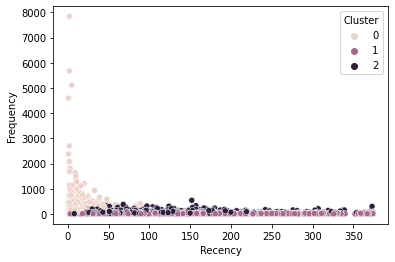

In [142]:
sns.scatterplot(x='Recency',y='Frequency',data=customerdf,hue='Cluster')

### We can see 3 cluster but those are not well Defined specialy 1 and 2. Let's Exlore more.

C:\Users\manda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


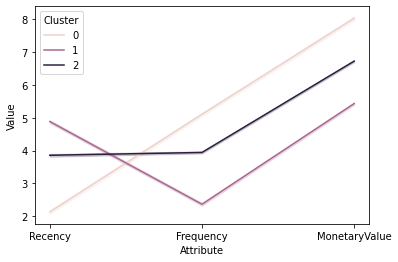

In [144]:
df_normalized = pd.DataFrame(customers_logT, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customerdf.index
df_normalized['Cluster'] = kmeans_model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
plt.show()

### Insights:
>- We infer that cluster 0 is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster of a loyal customer.
>- The cluster 1 is less frequent, less to spend, and their recent product buy is way before. Therefore, it could be the cluster of churned customers.
>- Then, the cluster 2 is less frequent, less to spend, but they buy the product recently. Therefore, it could be the cluster of new customer.

### For predicting clusters for new input sets for Customers. This problem now becomes a Multivariate Classification Problem. 

In [172]:
customers_logT['Clusters']=customerdf.Cluster

In [176]:
customers_logT.Clusters.value_counts()#Clusters will be our target class; it has 0,1 and 2 as value

2    1838
1    1478
0    1022
Name: Clusters, dtype: int64

#### Our data is already clean and bcz of log transformation it is scaled as well. We can directly deploy our Classification Model.

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
lr=LogisticRegression()

### Model Deployment for Classification

In [184]:
from sklearn.model_selection import train_test_split# splitting our data into train and test set

In [185]:
X_train, X_test, y_train, y_test = train_test_split(customers_logT[['Recency','Frequency','MonetaryValue']], customers_logT.Clusters, test_size = 0.25)


In [188]:
lr.fit(X_train,y_train)

LogisticRegression()

In [190]:
lrpred=lr.predict(X_test)

In [191]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,lrpred)

In [192]:
accuracy

0.9972350230414746

In [193]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lrpred)

In [194]:
cm

array([[260,   0,   1],
       [  0, 358,   2],
       [  0,   0, 464]], dtype=int64)

### We have high accuracy with Logistic Regression Model also Confusion Matrix looks good. We can use this model to classify new sets of customers.